In [1]:
from astropy.io import fits

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
def plot_lightcurve_photon(values,binsize,bins):
    s=[]
    for i in range(len(values)):
        hdulist = fits.open(values[i])
        data=hdulist[1].data
        s.append(data)
        
    tmean=np.zeros(bins)
    flux=np.zeros(bins)
    yerr=np.zeros(bins)
    k=0
    for j in range(len(values)):
        for i in range(s[j].size):
            tmean[k]=(s[j][i][0]+s[j][i][1])/2
            flux[k]=s[j][i][30]
            yerr[k]=s[j][i][39]
            k = k+1
    
    plt.figure(figsize=[20,10])
    plt.errorbar(tmean, flux,yerr=yerr,xerr=binsize/2, linestyle='None', marker='o')
    plt.xlabel('Fermi seconds since 2018-01-01 00:00:00 UTC')
    plt.ylabel('Photon flux [MeV cm$^{-2}$ s$^{-1}$]')
    plt.show
    plt.savefig('photon_lightcurve')

In [4]:
def plot_lightcurve_energy(values,binsize,bins):
    s=[]
    for i in range(len(values)):
        hdulist = fits.open(values[i])
        data=hdulist[1].data
        s.append(data)
        
    tmean=np.zeros(bins)
    eflux=np.zeros(bins)
    yerr=np.zeros(bins)
    k=0
    for j in range(len(values)):
        for i in range(s[j].size):
            tmean[k]=(s[j][i][0]+s[j][i][1])/2
            eflux[k]=s[j][i][101]
            yerr[k]=s[j][i][105]
            k = k+1
    
    plt.figure(figsize=[20,10])
    plt.errorbar(tmean, eflux,yerr=yerr,xerr=binsize/2, linestyle='None', marker='o')
    plt.xlabel('Fermi seconds since 2018-01-01 00:00:00 UTC')
    plt.ylabel('Energy flux [MeV cm$^{-2}$ s$^{-1}$]')
    plt.show
    plt.savefig('energy_lightcurve')

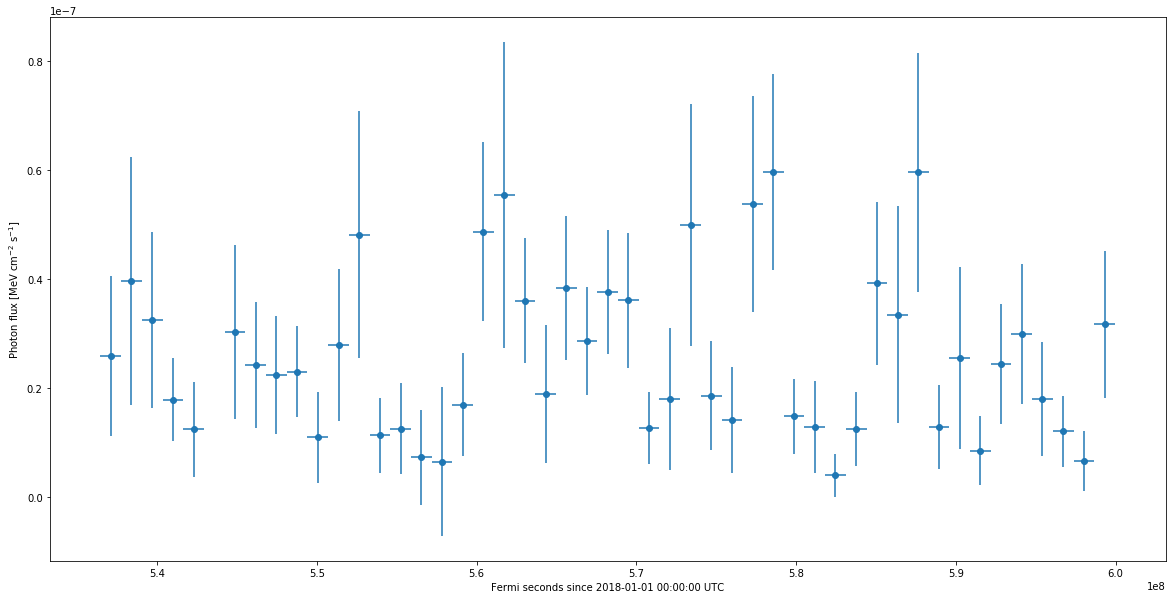

In [5]:
plot_lightcurve_photon(['5_1.fits','20_2.fits','23_3.fits'],15*24*3600,48)

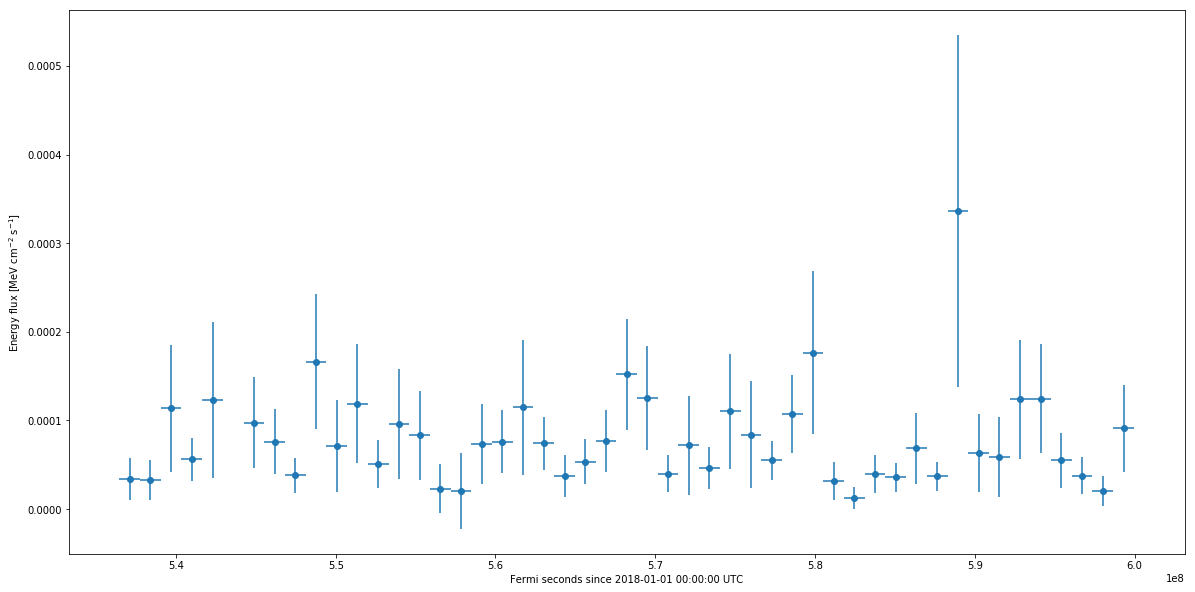

In [6]:
plot = plot_lightcurve_energy(['5_1.fits','20_2.fits','23_3.fits'],15*24*3600,48)